In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
style.use('seaborn-v0_8-poster')
style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [9]:
def format_large_numbers(num):
    if abs(num) >= 1_000_000_000:
        return f'{num / 1_000_000_000:.1f}B'
    elif abs(num) >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif abs(num) >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return str(num)

pd.set_option('display.float_format', lambda x: format_large_numbers(x))

In [2]:
import pandas as pd
file_path = r'C:\Users\Mohamed\Desktop\payroll.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_12104\666904642.py:3: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245879.12,0.00,12504.30,258383.42,16228.0,23508.9,MALE,BLACK
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101494.34,7824.99,12630.52,121949.85,6699.0,23508.9,MALE,ASIAN AMERICAN
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101345.12,22284.37,1566.75,125196.24,6689.0,23508.9,MALE,HISPANIC


In [3]:
df['PAY_YEAR'] = df['PAY_YEAR'].astype(str)
df['DEPARTMENT_NO'] = df['DEPARTMENT_NO'].astype(str)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685461 entries, 0 to 685460
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RECORD_NBR                     685461 non-null  object 
 1   PAY_YEAR                       685461 non-null  object 
 2   DEPARTMENT_NO                  685461 non-null  object 
 3   DEPARTMENT_TITLE               685461 non-null  object 
 4   JOB_CLASS_PGRADE               684919 non-null  object 
 5   JOB_TITLE                      684919 non-null  object 
 6   EMPLOYMENT_TYPE                685461 non-null  object 
 7   JOB_STATUS                     685461 non-null  object 
 8   MOU                            684777 non-null  object 
 9   MOU_TITLE                      684712 non-null  object 
 10  REGULAR_PAY                    685461 non-null  float64
 11  OVERTIME_PAY                   685027 non-null  float64
 12  ALL_OTHER_PAY                 

In [6]:
df.describe()

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,685.5K,685.0K,685.0K,685.5K,685.5K,685.5K
mean,61.6K,8.6K,4.7K,74.8K,17.8K,9.6K
std,46.0K,19.5K,10.9K,59.4K,18.9K,7.8K
min,-15.0K,-24.9K,-69.1K,-17.8K,-19.3K,-12.6K
25%,17.0K,0.0,140.0,19.2K,0.0,1.5K
50%,61.4K,366.0,1.6K,70.5K,12.1K,8.6K
75%,96.2K,7.9K,4.9K,113.4K,28.2K,16.5K
max,462.5K,434.4K,2.4M,2.4M,164.9K,255.6K


In [5]:
# Calculate the mean of non-negative values
# Replace negative values with the mean
mean_value = df[df['REGULAR_PAY'] >= 0]['REGULAR_PAY'].mean()
df['REGULAR_PAY'] = df['REGULAR_PAY'].apply(lambda x: mean_value if x < 0 else x)

mean_value = df[df['OVERTIME_PAY'] >= 0]['OVERTIME_PAY'].mean()

# Replace negative values with the mean
df['OVERTIME_PAY'] = df['OVERTIME_PAY'].apply(lambda x: mean_value if x < 0 else x)

mean_value = df[df['OVERTIME_PAY'] >= 0]['OVERTIME_PAY'].mean()

# Replace negative values with the mean
df['ALL_OTHER_PAY'] = df['ALL_OTHER_PAY'].apply(lambda x: mean_value if x < 0 else x)

mean_value = df[df['TOTAL_PAY'] >= 0]['TOTAL_PAY'].mean()

# Replace negative values with the mean
df['TOTAL_PAY'] = df['TOTAL_PAY'].apply(lambda x: mean_value if x < 0 else x)


In [6]:
mean_value = df[df['CITY_RETIREMENT_CONTRIBUTIONS'] >= 0]['CITY_RETIREMENT_CONTRIBUTIONS'].mean()

# Replace negative values with the mean
df['CITY_RETIREMENT_CONTRIBUTIONS'] = df['CITY_RETIREMENT_CONTRIBUTIONS'].apply(lambda x: mean_value if x < 0 else x)

In [7]:
mean_value = df[df['BENEFIT_PAY'] >= 0]['BENEFIT_PAY'].mean()

# Replace negative values with the mean
df['BENEFIT_PAY'] = df['BENEFIT_PAY'].apply(lambda x: mean_value if x < 0 else x)

In [11]:
df.describe()

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,685.5K,685.0K,685.0K,685.5K,685.5K,685.5K
mean,61.6K,8.6K,4.8K,74.9K,17.8K,9.6K
std,45.9K,19.5K,10.9K,59.3K,18.9K,7.8K
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0K,0.0,150.0,19.3K,0.0,1.5K
50%,61.5K,369.13,1.6K,70.6K,12.1K,8.6K
75%,96.2K,7.9K,5.1K,113.4K,28.2K,16.5K
max,462.5K,434.4K,2.4M,2.4M,164.9K,255.6K


In [26]:
df.head()

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55.7K,4.8K,2.0K,62.5K,3.7K,23.5K,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139.2K,16.3K,6.2K,161.7K,9.2K,23.5K,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245.9K,0.0,12.5K,258.4K,16.2K,23.5K,MALE,BLACK
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101.5K,7.8K,12.6K,121.9K,6.7K,23.5K,MALE,ASIAN AMERICAN
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101.3K,22.3K,1.6K,125.2K,6.7K,23.5K,MALE,HISPANIC


In [12]:
df.nunique()

RECORD_NBR                       175736
PAY_YEAR                             10
DEPARTMENT_NO                        52
DEPARTMENT_TITLE                     54
JOB_CLASS_PGRADE                   3095
JOB_TITLE                          2164
EMPLOYMENT_TYPE                       3
JOB_STATUS                            2
MOU                                 105
MOU_TITLE                            59
REGULAR_PAY                      425823
OVERTIME_PAY                     323131
ALL_OTHER_PAY                    297019
TOTAL_PAY                        617086
CITY_RETIREMENT_CONTRIBUTIONS    266422
BENEFIT_PAY                       48676
GENDER                                4
ETHNICITY                            15
dtype: int64

In [33]:
null_counts = df.isnull().sum()

print(null_counts)

RECORD_NBR                          0
PAY_YEAR                            0
DEPARTMENT_NO                       0
DEPARTMENT_TITLE                    0
JOB_CLASS_PGRADE                  542
JOB_TITLE                         542
EMPLOYMENT_TYPE                     0
JOB_STATUS                          0
MOU                               684
MOU_TITLE                         749
REGULAR_PAY                         0
OVERTIME_PAY                      434
ALL_OTHER_PAY                     434
TOTAL_PAY                           0
CITY_RETIREMENT_CONTRIBUTIONS       0
BENEFIT_PAY                         0
GENDER                           3861
ETHNICITY                        4212
dtype: int64


In [39]:
null_counts = df.isnull().sum()
total_counts = len(df)
null_percentage = (null_counts / total_counts) * 100

print(null_percentage)

RECORD_NBR                                      0.0
PAY_YEAR                                        0.0
DEPARTMENT_NO                                   0.0
DEPARTMENT_TITLE                                0.0
JOB_CLASS_PGRADE                0.07907087347055486
JOB_TITLE                       0.07907087347055486
EMPLOYMENT_TYPE                                 0.0
JOB_STATUS                                      0.0
MOU                             0.09978685877095853
MOU_TITLE                       0.10926952809860808
REGULAR_PAY                                     0.0
OVERTIME_PAY                    0.06331505366461404
ALL_OTHER_PAY                   0.06331505366461404
TOTAL_PAY                                       0.0
CITY_RETIREMENT_CONTRIBUTIONS                   0.0
BENEFIT_PAY                                     0.0
GENDER                           0.5632705580623844
ETHNICITY                         0.614476972431692
dtype: float64


In [35]:
df.head()

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55.7K,4.8K,2.0K,62.5K,3.7K,23.5K,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139.2K,16.3K,6.2K,161.7K,9.2K,23.5K,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245.9K,0.0,12.5K,258.4K,16.2K,23.5K,MALE,BLACK
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101.5K,7.8K,12.6K,121.9K,6.7K,23.5K,MALE,ASIAN AMERICAN
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101.3K,22.3K,1.6K,125.2K,6.7K,23.5K,MALE,HISPANIC


In [13]:
grouped = df.groupby(['DEPARTMENT_NO', 'DEPARTMENT_TITLE'])
grouped_count = grouped.size().reset_index(name='counts')
grouped_count

,DEPARTMENT_NO,DEPARTMENT_TITLE,counts
0,10,CITY ADMINISTRATIVE OFFICER,1758
1,11,PUBLIC ACCOUNTABILITY,30
2,12,CITY ATTORNEY,12340
3,13,CANNABIS REGULATION,181
4,14,CITY CLERK,8773
5,15,"CIVIL, HUMAN RIGHTS AND EQUITY DEPARTMENT",38
6,16,CITY EMPLOYEES RETIREMENT SYSTEM,2844
7,17,CITY ETHICS COMMISSION,392
8,18,COLISEUM/SPORTS ARENA,36
9,19,YOUTH DEVELOPMENT DEPARTMENT,11


In [14]:
##Finding duplicate to clean
duplicates = grouped_count[grouped_count['DEPARTMENT_NO'].duplicated(keep=False)]
duplicates

,DEPARTMENT_NO,DEPARTMENT_TITLE,counts
28,43,HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,6794
29,43,LOS ANGELES HOUSING,1464
33,48,LOS ANGELES CITY TOURISM DEPARTMENT,19
34,48,LOS ANGELES DEPARTMENT OF CONVENTION AND TOURI...,1025


In [15]:
df['DEPARTMENT_TITLE'] = df['DEPARTMENT_TITLE'].replace({
    'LOS ANGELES HOUSING': 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT',
    'LOS ANGELES CITY TOURISM DEPARTMENT': 'LOS ANGELES CITY TOURISM DEPARTMENT'
})
df.head()

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55.7K,4.8K,2.0K,62.5K,3.7K,23.5K,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139.2K,16.3K,6.2K,161.7K,9.2K,23.5K,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245.9K,0.0,12.5K,258.4K,16.2K,23.5K,MALE,BLACK
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101.5K,7.8K,12.6K,121.9K,6.7K,23.5K,MALE,ASIAN AMERICAN
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101.3K,22.3K,1.6K,125.2K,6.7K,23.5K,MALE,HISPANIC


In [43]:
df.nunique()

RECORD_NBR                       175736
PAY_YEAR                             10
DEPARTMENT_NO                        52
DEPARTMENT_TITLE                     53
JOB_CLASS_PGRADE                   3095
JOB_TITLE                          2164
EMPLOYMENT_TYPE                       3
JOB_STATUS                            2
MOU                                 105
MOU_TITLE                            59
REGULAR_PAY                      425823
OVERTIME_PAY                     323131
ALL_OTHER_PAY                    297019
TOTAL_PAY                        617086
CITY_RETIREMENT_CONTRIBUTIONS    266422
BENEFIT_PAY                       48676
GENDER                                4
ETHNICITY                            15
dtype: int64

In [16]:
grouped = df.groupby(['DEPARTMENT_NO', 'DEPARTMENT_TITLE'])
grouped_count = grouped.size().reset_index(name='counts')
grouped_count

,DEPARTMENT_NO,DEPARTMENT_TITLE,counts
0,10,CITY ADMINISTRATIVE OFFICER,1758
1,11,PUBLIC ACCOUNTABILITY,30
2,12,CITY ATTORNEY,12340
3,13,CANNABIS REGULATION,181
4,14,CITY CLERK,8773
5,15,"CIVIL, HUMAN RIGHTS AND EQUITY DEPARTMENT",38
6,16,CITY EMPLOYEES RETIREMENT SYSTEM,2844
7,17,CITY ETHICS COMMISSION,392
8,18,COLISEUM/SPORTS ARENA,36
9,19,YOUTH DEVELOPMENT DEPARTMENT,11


In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
##Finding duplicate to clean
duplicates = grouped_count[grouped_count['DEPARTMENT_NO'].duplicated(keep=False)]
duplicates

,DEPARTMENT_NO,DEPARTMENT_TITLE,counts
32,48,LOS ANGELES CITY TOURISM DEPARTMENT,19
33,48,LOS ANGELES DEPARTMENT OF CONVENTION AND TOURISM DEVELOPMENT,1025


In [19]:
df['DEPARTMENT_TITLE'] = df['DEPARTMENT_TITLE'].replace({
    'LOS ANGELES CITY TOURISM DEPARTMENT': 'LOS ANGELES DEPARTMENT OF CONVENTION AND TOURISM DEVELOPMENT'
})
df.head()

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55.7K,4.8K,2.0K,62.5K,3.7K,23.5K,FEMALE,HISPANIC
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139.2K,16.3K,6.2K,161.7K,9.2K,23.5K,FEMALE,ASIAN AMERICAN
2,303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245.9K,0.0,12.5K,258.4K,16.2K,23.5K,MALE,BLACK
3,303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101.5K,7.8K,12.6K,121.9K,6.7K,23.5K,MALE,ASIAN AMERICAN
4,303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101.3K,22.3K,1.6K,125.2K,6.7K,23.5K,MALE,HISPANIC


In [48]:
df.nunique()

RECORD_NBR                       175736
PAY_YEAR                             10
DEPARTMENT_NO                        52
DEPARTMENT_TITLE                     52
JOB_CLASS_PGRADE                   3095
JOB_TITLE                          2164
EMPLOYMENT_TYPE                       3
JOB_STATUS                            2
MOU                                 105
MOU_TITLE                            59
REGULAR_PAY                      425823
OVERTIME_PAY                     323131
ALL_OTHER_PAY                    297019
TOTAL_PAY                        617086
CITY_RETIREMENT_CONTRIBUTIONS    266422
BENEFIT_PAY                       48676
GENDER                                4
ETHNICITY                            15
dtype: int64

In [20]:
df[['JOB_CLASS', 'PGRADE']] = df['JOB_CLASS_PGRADE'].str.split('-', expand=True)


In [21]:
df = df.drop(columns=['JOB_CLASS_PGRADE'])
df.head()

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,JOB_CLASS,PGRADE
0,303030303632,2017,98,WATER AND POWER,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55.7K,4.8K,2.0K,62.5K,3.7K,23.5K,FEMALE,HISPANIC,3156,5
1,3030303036,2017,98,WATER AND POWER,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139.2K,16.3K,6.2K,161.7K,9.2K,23.5K,FEMALE,ASIAN AMERICAN,9105,5
2,303030313232,2017,98,WATER AND POWER,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245.9K,0.0,12.5K,258.4K,16.2K,23.5K,MALE,BLACK,9602,4
3,303030313632,2017,98,WATER AND POWER,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101.5K,7.8K,12.6K,121.9K,6.7K,23.5K,MALE,ASIAN AMERICAN,5885,5
4,303030323632,2017,98,WATER AND POWER,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101.3K,22.3K,1.6K,125.2K,6.7K,23.5K,MALE,HISPANIC,3841,5


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685461 entries, 0 to 685460
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RECORD_NBR                     685461 non-null  object 
 1   PAY_YEAR                       685461 non-null  object 
 2   DEPARTMENT_NO                  685461 non-null  object 
 3   DEPARTMENT_TITLE               685461 non-null  object 
 4   JOB_TITLE                      684919 non-null  object 
 5   EMPLOYMENT_TYPE                685461 non-null  object 
 6   JOB_STATUS                     685461 non-null  object 
 7   MOU                            684777 non-null  object 
 8   MOU_TITLE                      684712 non-null  object 
 9   REGULAR_PAY                    685461 non-null  float64
 10  OVERTIME_PAY                   685027 non-null  float64
 11  ALL_OTHER_PAY                  685027 non-null  float64
 12  TOTAL_PAY                     

In [58]:
df.nunique()

RECORD_NBR                       175736
PAY_YEAR                             10
DEPARTMENT_NO                        52
DEPARTMENT_TITLE                     52
JOB_TITLE                          2164
EMPLOYMENT_TYPE                       3
JOB_STATUS                            2
MOU                                 105
MOU_TITLE                            59
REGULAR_PAY                      425823
OVERTIME_PAY                     323131
ALL_OTHER_PAY                    297019
TOTAL_PAY                        617086
CITY_RETIREMENT_CONTRIBUTIONS    266422
BENEFIT_PAY                       48676
GENDER                                4
ETHNICITY                            15
JOB_CLASS                          1272
PGRADE                               36
dtype: int64

In [21]:
distinct_values = df['PGRADE'].unique()
distinct_values

array(['5', '4', '1', '3', '2', 'R', '0', 'A', 'C', 'E', '6', 'D', 'G',
       nan, 'Y', 'B', 'Z', 'H', 'F', 'M', 'X', 'J', '7', '9', '8', 'K',
       'L', 'N', 'U', 'T', 'S', 'V', 'O', 'I', 'W', None, 'P', 'Q'],
      dtype=object)

In [52]:
df['PGRADE'] = df['PGRADE'].replace({'None': 'null', 'nan': 'null'})
distinct_values = df['PGRADE'].unique()
distinct_values

array(['5', '4', '1', '3', '2', 'R', '0', 'A', 'C', 'E', '6', 'D', 'G',
       nan, 'Y', 'B', 'Z', 'H', 'F', 'M', 'X', 'J', '7', '9', '8', 'K',
       'L', 'N', 'U', 'T', 'S', 'V', 'O', 'I', 'W', None, 'P', 'Q'],
      dtype=object)

In [53]:
df['PGRADE'] = df['PGRADE'].replace({None: 'null', np.nan: 'null'})
distinct_values = df['PGRADE'].unique()
distinct_values

array(['5', '4', '1', '3', '2', 'R', '0', 'A', 'C', 'E', '6', 'D', 'G',
       'null', 'Y', 'B', 'Z', 'H', 'F', 'M', 'X', 'J', '7', '9', '8', 'K',
       'L', 'N', 'U', 'T', 'S', 'V', 'O', 'I', 'W', 'P', 'Q'],
      dtype=object)

In [54]:
df.sample(5)

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,JOB_CLASS,PGRADE
40315,323738383633,2017,88,RECREATION AND PARKS,SPECIAL PROGRAM ASSISTANT II,PART_TIME,NOT_ACTIVE,04,EQUIPMENT OPERATION AND LABOR,7.2K,0.0,420.33,7.6K,0.0,2.7K,MALE,OTHER,2415,0
621476,3339313238,2021,88,RECREATION AND PARKS,RECREATION ASSISTANT,PART_TIME,ACTIVE,07,RECREATION ASSISTANTS,383.88,0.0,0.0,383.88,0.0,437.99,FEMALE,BLACK,2498,0
635966,3338353138,2021,70,POLICE,POLICE OFFICER III,FULL_TIME,ACTIVE,24.0,"POLICE OFFICERS, LIEUTENANT AND BELOW",130.4K,10.5K,1.9K,142.7K,61.1K,19.7K,MALE,CAUCASIAN,2214,3
50292,343434333033,2017,66,PERSONNEL,CLERK,PART_TIME,NOT_ACTIVE,03,CLERICAL,16.5K,0.0,0.0,16.5K,0.0,0.0,FEMALE,HISPANIC,1141,0
567237,303430333733,2022,82,PUBLIC WORKS - SANITATION,ENVIRONMENTAL ENGINEERING ASSOCIATE III,FULL_TIME,ACTIVE,08,PROFESSIONAL ENGINEERING AND SCIENTIFIC,58.6K,732.6,4.7K,64.0K,17.4K,10.5K,FEMALE,CAUCASIAN,7871,3


In [55]:
grouped_df = df.groupby(['PGRADE', 'JOB_CLASS'])['TOTAL_PAY'].sum()
grouped_df

PGRADE  JOB_CLASS
0       0001         2.1M
        0002        27.8M
        0003         2.3M
        0004         2.5M
        0010         2.7M
                     ... 
null    978          1.3M
        979          3.1M
        994         34.1M
        995         61.0M
        9998         1.1M
Name: TOTAL_PAY, Length: 3095, dtype: float64

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [66]:
grouped_df = df.groupby('PGRADE')['TOTAL_PAY'].sum()
grouped_df

PGRADE
0       12.6B
1        6.1B
2       12.2B
3        7.8B
4      795.5M
5        6.7B
6      345.5M
7        5.9M
8      343.4K
9       32.4M
A      507.6M
B      103.8M
C      321.3M
D       48.7M
E       44.8M
F       40.6M
G      227.1M
H       32.1M
I      184.9K
J        3.5M
K      618.2K
L      886.9K
M       16.2M
N        1.7M
O       16.2M
P      202.0K
Q       49.9K
R       21.9M
S      744.8K
T       11.4M
U      310.4K
V      478.3K
W      185.8K
X       13.4M
Y        7.7M
Z       27.1M
null     3.3B
Name: TOTAL_PAY, dtype: float64

In [23]:
grouped_df = df.groupby('PGRADE').agg(
    TOTAL_PAY_SUM=('TOTAL_PAY', 'sum'),
    TOTAL_PAY_COUNT=('TOTAL_PAY', 'count')
)

# Sort the results in descending order by TOTAL_PAY_SUM
sorted_df = grouped_df.sort_values(by='TOTAL_PAY_SUM', ascending=False)

In [24]:
sorted_df

,TOTAL_PAY_SUM,TOTAL_PAY_COUNT
PGRADE,,
0,12.6B,245440
2,12.2B,139342
3,7.8B,65496
5,6.7B,56940
1,6.1B,83557
4,795.5M,8389
A,507.6M,18549
6,345.5M,6054
C,321.3M,10782


In [61]:
df.sample(5)

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,JOB_CLASS,PGRADE
178937,313838363633,2015,14,CITY CLERK,ELECTION ASSISTANT I,PART_TIME,NOT_ACTIVE,00,NON-REPRESENTED,190.7,0.0,0.0,190.7,0.0,0.0,FEMALE,HISPANIC,0728,0
80745,3337333431,2013,4,AIRPORTS,AIRPORT POLICE OFFICER II,FULL_TIME,NOT_ACTIVE,30.0,LOS ANGELES AIRPORT PEACE OFFICERS,33.7K,0.0,4.4K,38.1K,10.0K,64.1,MALE,BLACK,3225,2
366184,3635343732,2020,12,CITY ATTORNEY,DEPUTY CITY ATTORNEY IV,FULL_TIME,NOT_ACTIVE,29,DEPUTY CITY ATTORNEYS,25.7K,0.0,5.1K,30.9K,7.6K,1.7K,FEMALE,CAUCASIAN,0597,0
592786,323830383633,2020,98,WATER AND POWER,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,96.7K,49.9K,14.7K,161.3K,0.0,24.8K,MALE,HISPANIC,3841,5
106923,3835393134,2013,70,POLICE,POLICE DETECTIVE III,FULL_TIME,NOT_ACTIVE,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",119.1K,0.0,2.5K,121.6K,55.8K,6.6K,FEMALE,HISPANIC,2223,3


In [62]:
df.nunique()

RECORD_NBR                       175736
PAY_YEAR                             10
DEPARTMENT_NO                        52
DEPARTMENT_TITLE                     52
JOB_TITLE                          2164
EMPLOYMENT_TYPE                       3
JOB_STATUS                            2
MOU                                 105
MOU_TITLE                            59
REGULAR_PAY                      425823
OVERTIME_PAY                     323131
ALL_OTHER_PAY                    297019
TOTAL_PAY                        617086
CITY_RETIREMENT_CONTRIBUTIONS    266422
BENEFIT_PAY                       48676
GENDER                                4
ETHNICITY                            15
JOB_CLASS                          1272
PGRADE                               37
dtype: int64

In [64]:
df.describe()

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,685.5K,685.0K,685.0K,685.5K,685.5K,685.5K
mean,61.6K,8.6K,4.8K,74.9K,17.8K,9.6K
std,45.9K,19.5K,10.9K,59.3K,18.9K,7.8K
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0K,0.0,150.0,19.3K,0.0,1.5K
50%,61.5K,369.13,1.6K,70.6K,12.1K,8.6K
75%,96.2K,7.9K,5.1K,113.4K,28.2K,16.5K
max,462.5K,434.4K,2.4M,2.4M,164.9K,255.6K


In [25]:
total_pay_by_year = df.groupby('PAY_YEAR')['TOTAL_PAY'].sum()
total_pay_by_year


PAY_YEAR
2013   4.7B
2014   4.9B
2015   5.1B
2016   5.1B
2017   5.3B
2018   5.7B
2019   5.9B
2020   6.6B
2021   5.8B
2022   2.2B
Name: TOTAL_PAY, dtype: float64

In [26]:
average_pay_by_year = df.groupby('PAY_YEAR')['TOTAL_PAY'].mean()
print(average_pay_by_year)


PAY_YEAR
2013   73.4K
2014   76.8K
2015   74.8K
2016   70.6K
2017   73.5K
2018   72.1K
2019   79.6K
2020   88.5K
2021   85.7K
2022   44.3K
Name: TOTAL_PAY, dtype: float64


In [28]:
department_pay_by_year = df.groupby(['PAY_YEAR', 'DEPARTMENT_TITLE'])['TOTAL_PAY'].agg(['sum', 'mean'])
department_pay_by_year


sum               mean
PAY_YEAR DEPARTMENT_TITLE                                                                                  
2013     AGING                                                                      4.2M              17.5K
         AIRPORTS                                                                 294.7M              74.1K
         ANIMAL SERVICES                                                           19.3M              54.1K
         BUILDING AND SAFETY                                                       75.6M              79.8K
         CITY ADMINISTRATIVE OFFICER                                               11.7M              71.1K
         CITY ATTORNEY                                                             98.3M              95.2K
         CITY CLERK                                                                13.0M               5.1K
         CITY EMPLOYEES RETIREMENT SYSTEM                                          11.3M              56.3K
         CITY ETHICS COMMISSION                                                     2.1M              66.8K
         CITY PLANNING                                                             22.1M              69.5K
         COLISEUM/SPORTS ARENA                                                      1.4M              37.6K
         CONTROLLER                                                                14.3M              74.2K
         COUNCIL                                                                   26.5M              41.6K
         CULTURAL AFFAIRS                                                           4.3M              27.7K
         DISABILITY                                                                 1.3M              75.4K
         ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT                             18.7M              52.0K
         EL PUEBLO DE LOS ANGELES HISTORICAL MONUMENT AUTHORITY                     1.2M              28.6K
         EMERGENCY MANAGEMENT                                                       2.5M              55.3K
         EMPLOYEE RELATIONS BOARD                                                 244.5K              30.6K
         FIRE                                                                     548.0M             149.5K
         GENERAL SERVICES                                                         117.4M              57.8K
         HARBOR                                                                   102.2M              73.2K
         HOUSING AND COMMUNITY INVESTMENT DEPARTMENT                               47.7M              66.2K
         INFORMATION TECHNOLOGY AGENCY                                             48.9M              90.0K
         LIBRARY                                                                   58.2M              35.7K
         LOS ANGELES DEPARTMENT OF CONVENTION AND TOURISM DEVELOPMENT              13.5M              26.1K
         MAYOR                                                                     13.0M              45.2K
         NEIGHBORHOOD EMPOWERMENT                                                   1.8M              42.4K
         OFFICE OF FINANCE                                                         27.5M              64.9K
         PENSION                                                                   10.1M              65.5K
         PERSONNEL                                                                 42.1M              54.3K
         POLICE                                                                     1.3B              89.7K
         PUBLIC WORKS - BOARD OF PUBLIC WORKS                                       6.7M              74.7K
         PUBLIC WORKS - CONTRACT ADMINISTRATION                                    28.5M              86.5K
         PUBLIC WORKS - ENGINEERING                                                67.7M              86.8K
         PUBLIC WORKS - SANITATION                                                203.6M 

In [30]:
department_pay_by_year2 = df.groupby(['PAY_YEAR', 'PGRADE'])['TOTAL_PAY'].agg(['sum', 'mean'])
department_pay_by_year2

sum   mean
PAY_YEAR PGRADE              
2013     0        1.0B  50.1K
         1      473.5M  77.0K
         2        1.1B  84.9K
         3      687.8M 118.9K
         4       24.2M  96.8K
         5       27.5M  80.7K
         6       29.0M  59.9K
         7      686.0K  31.2K
         8      115.9K  57.9K
         9        6.0M  51.2K
         A       75.3M  22.1K
         B       30.0M  34.3K
         C       13.8M  16.6K
         D        8.8M  49.2K
         E        3.9M  28.1K
         F        6.0M  41.3K
         G       52.0M 152.9K
         H        3.2M  23.3K
         I      132.0K  66.0K
         J      678.9K  14.1K
         K      371.97 371.97
         L      157.6K 157.6K
         M        1.3M  74.5K
         N      598.5K 119.7K
         O       90.4K  45.2K
         R        1.4M  21.8K
         S      327.7K  46.8K
         T       24.2K  24.2K
         U       79.0K  39.5K
         V      215.2K  53.8K
         Y       97.4K  48.7K
         Z        2.8M  33.6K
2014     0        1.1B  57.8K
         1      508.6M  72.8K
         2        1.2B  87.0K
         3      734.3M 122.7K
         4       25.3M  94.8K
         5       30.1M  89.6K
         6       32.5M  64.6K
         7      664.3K  30.2K
         8       39.6K  39.6K
         9        5.9M  51.4K
         A       72.0M  21.6K
         B       30.9M  34.8K
         C       11.7M  13.5K
         D        8.6M  45.3K
         E       10.9M  16.1K
         F        6.7M  39.8K
         G       56.8M 156.2K
         H        3.4M  25.9K
         I       52.9K  26.4K
         J      705.9K  13.8K
         K      145.4K  72.7K
         L       86.8K  86.8K
         M        1.2M  69.4K
         N      490.9K 163.6K
         O      110.1K  55.0K
         P       96.9K  48.5K
         R        1.3M  20.3K
         S      217.4K 108.7K
         T       54.0K  54.0K
         U      129.5K  64.8K
         V      219.9K  55.0K
         W       58.6K  58.6K
         Y       72.2K  72.2K
         Z        2.4M  32.8K
2015     0        1.1B  51.4K
         1      559.3M  69.5K
         2        1.2B  88.0K
         3      753.7M 123.9K
         4       25.9M  73.7K
         5       29.6M  84.9K
         6       32.8M  52.7K
         7      638.5K  30.4K
         8       36.3K  36.3K
         9        5.2M  43.2K
         A       56.8M  19.1K
         B        6.3M  24.5K
         C       18.1M  20.5K
         D        8.8M  31.3K
         E       16.4M  24.3K
         F       10.0M  57.8K
         G       54.3M 174.5K
         H        3.3M  27.2K
         J      494.6K  12.1K
         K       96.8K  32.3K
         L      291.5K  72.9K
         M        1.2M  59.1K
         N      649.1K 162.3K
         O       24.8K  24.8K
         P      105.0K  52.5K
         Q       49.9K  49.9K
         R        1.6M  22.3K
         S      185.9K 185.9K
         T        9.0K   9.0K
         U      101.9K 101.9K
         V       43.2K  14.4K
         W      127.2K  42.4K
         X      119.4K  39.8K
         Z        2.4M  33.8K
2016     0        1.1B  48.8K
         1      637.1M  66.6K
         2        1.2B  85.1K
         3      773.3M 113.6K
         4       81.7M  96.4K
         5      988.0M 111.3K
         6       34.7M  49.2K
         7      804.3K  29.8K
         8       39.7K  39.7K
         9        2.7M  42.3K
         A       45.2M  16.7K
         B       11.1M   8.8K
         C       37.3M  28.8K
         D        9.3M  32.9K
         E       10.0M  13.4K
         F       10.8M  63.9K
         G       52.3M 152.2K
         H        3.8M  30.2K
         J      208.7K   5.6K
         K        5.9K   5.9K
         L      106.2K 106.2K
         M        1.1M  59.4K
         N         0.0    0.0
         R        1.9M  23.8K
         S       13.5K  13.5K
         Y        1.7K   1.7K
         Z        2.3M  31.4K
2017     0        1.3B  48.6K
         1      666.1M  70.4K
         2        1.3B  87.1K
         3      812.4M 118.4K
         4       98.4M  94.8K

In [31]:
job_title_pay_by_year = df.groupby(['PAY_YEAR', 'JOB_TITLE'])['TOTAL_PAY'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
print(job_title_pay_by_year)


                                                                                                sum               mean
PAY_YEAR JOB_TITLE                                                                                                    
2021     POLICE OFFICER II                                                                   505.6M             111.7K
2020     POLICE OFFICER II                                                                   498.1M             114.2K
2019     POLICE OFFICER II                                                                   457.0M             104.7K
2015     POLICE OFFICER II                                                                   446.8M              97.5K
2014     POLICE OFFICER II                                                                   445.8M              84.0K
2018     POLICE OFFICER II                                                                   437.8M             103.6K
2013     POLICE OFFICER II                      

In [33]:
gender_pay_by_year = df.groupby(['PAY_YEAR', 'GENDER'])['TOTAL_PAY'].mean()
ethnicity_pay_by_year = df.groupby(['PAY_YEAR', 'ETHNICITY'])['TOTAL_PAY'].mean()
gender_pay_by_year
ethnicity_pay_by_year


PAY_YEAR  ETHNICITY                     
2013      AMERICAN INDIAN                   76.8K
          ASIAN                             79.7K
          BLACK                             63.6K
          CAUCASIAN                         86.9K
          FILIPINO                          66.2K
          FILLIPINO                        108.4K
          HISPANIC                          66.9K
          NATIVE_AMERICAN                  108.7K
          OTHER                             30.8K
          TWO OR MORE RACES                 44.5K
          UNKNOWN                           53.9K
2014      AMERICAN INDIAN                   79.4K
          ASIAN                             83.0K
          BLACK                             69.5K
          CAUCASIAN                         91.1K
          FILIPINO                          72.5K
          FILLIPINO                        107.1K
          HISPANIC                          69.5K
          NATIVE_AMERICAN                  113.7K
         

In [36]:
employment_type_pay_by_year = df.groupby(['PAY_YEAR', 'EMPLOYMENT_TYPE'])['TOTAL_PAY'].mean()
job_status_pay_by_year = df.groupby(['PAY_YEAR', 'JOB_STATUS'])['TOTAL_PAY'].mean()
employment_type_pay_by_year


PAY_YEAR  EMPLOYMENT_TYPE
2013      FULL_TIME          90.9K
          PART_TIME          10.2K
          PER_EVENT          11.0K
2014      FULL_TIME          93.0K
          PART_TIME          11.2K
          PER_EVENT          10.9K
2015      FULL_TIME          92.7K
          PART_TIME          10.2K
          PER_EVENT          15.2K
2016      FULL_TIME          89.3K
          PART_TIME           9.1K
          PER_EVENT           8.1K
2017      FULL_TIME          89.8K
          PART_TIME          10.3K
          PER_EVENT          13.3K
2018      FULL_TIME          87.9K
          PART_TIME          11.4K
          PER_EVENT           1.7K
2019      FULL_TIME          95.8K
          PART_TIME          12.4K
          PER_EVENT          10.5K
2020      FULL_TIME         105.1K
          PART_TIME          12.0K
          PER_EVENT           8.0K
2021      FULL_TIME          98.5K
          PART_TIME          13.7K
          PER_EVENT          19.7K
2022      FULL_TIME          

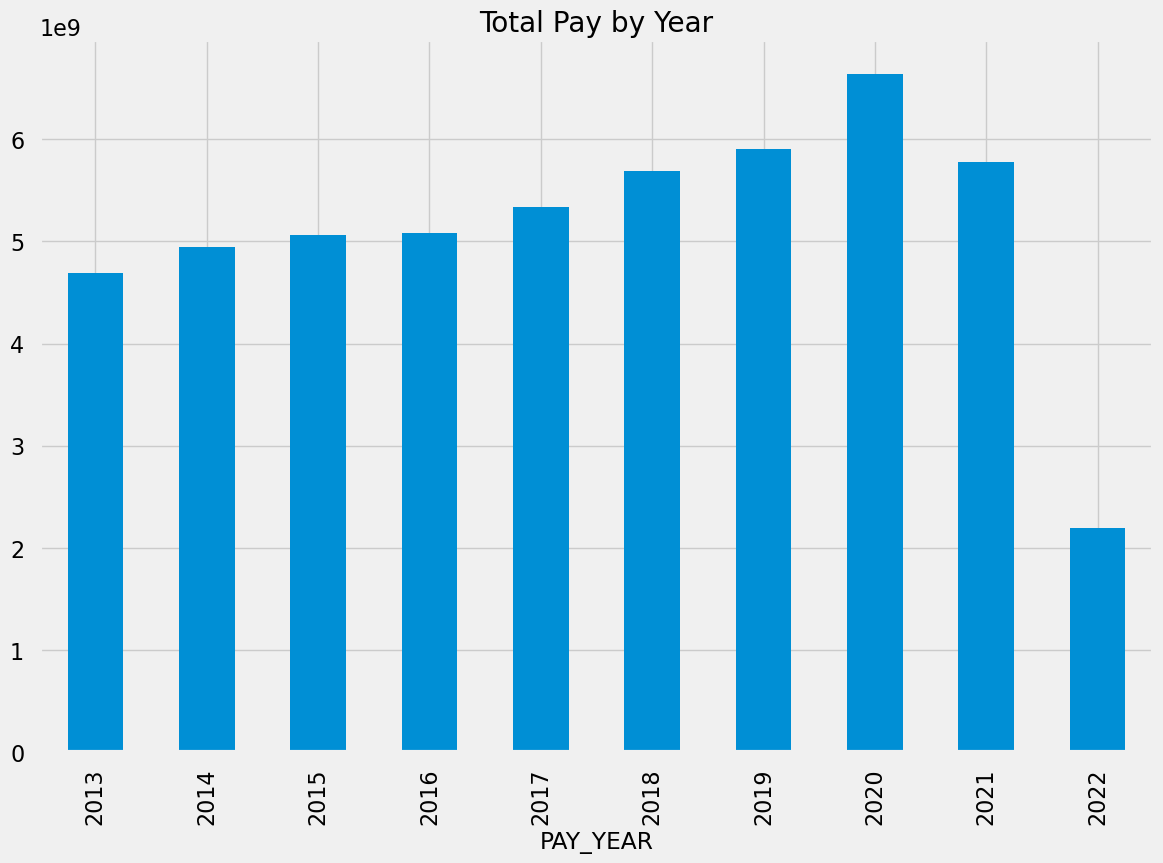

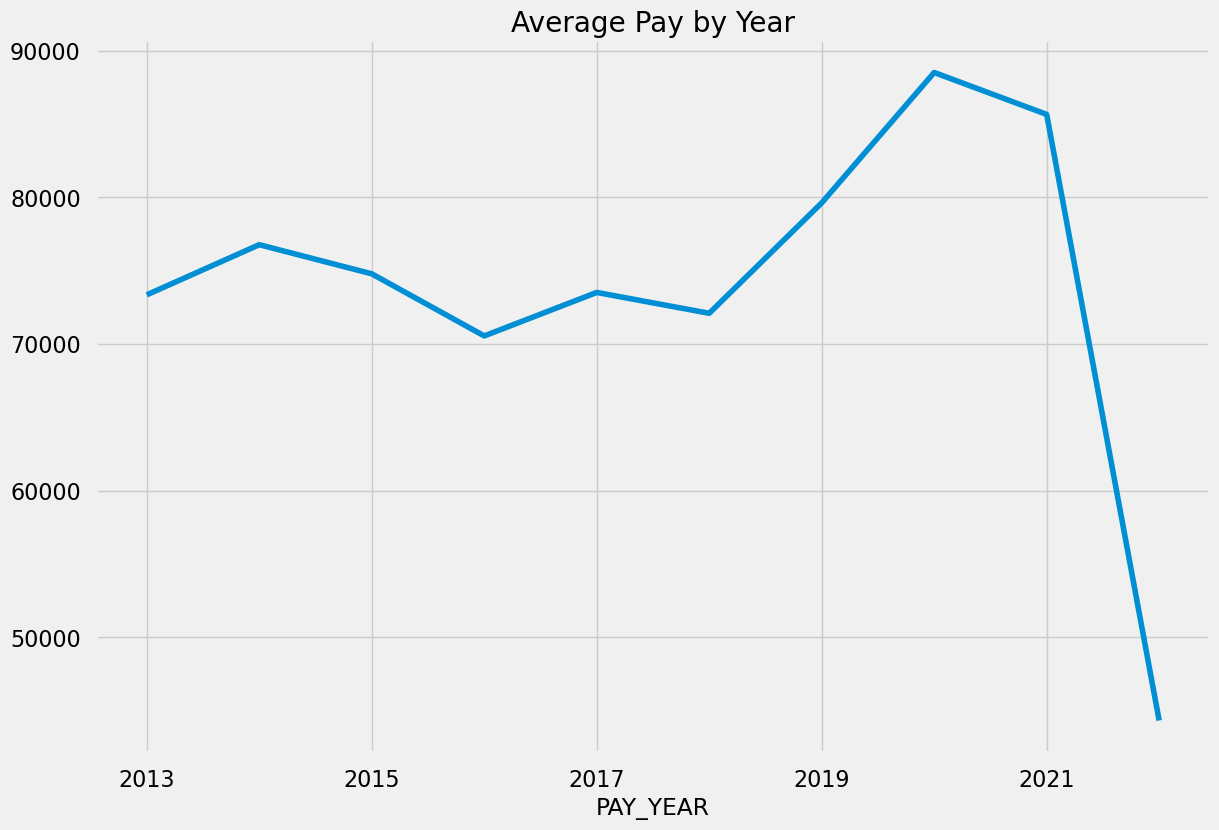

In [37]:
import matplotlib.pyplot as plt

# Total Pay by Year
total_pay_by_year.plot(kind='bar', title='Total Pay by Year')
plt.show()

# Average Pay by Year
average_pay_by_year.plot(kind='line', title='Average Pay by Year')
plt.show()


In [38]:
overtime_pay_by_year = df.groupby('PAY_YEAR')['OVERTIME_PAY'].sum()
print(overtime_pay_by_year)


PAY_YEAR
2013   384.1M
2014   476.6M
2015   560.0M
2016   581.1M
2017   645.3M
2018   708.9M
2019   782.3M
2020   805.3M
2021   688.8M
2022   250.1M
Name: OVERTIME_PAY, dtype: float64


In [39]:
regular_vs_overtime_pay = df.groupby('PAY_YEAR')[['REGULAR_PAY', 'OVERTIME_PAY']].sum()
print(regular_vs_overtime_pay)


          REGULAR_PAY  OVERTIME_PAY
PAY_YEAR                           
2013             4.0B        384.1M
2014             4.1B        476.6M
2015             4.1B        560.0M
2016             4.2B        581.1M
2017             4.4B        645.3M
2018             4.7B        708.9M
2019             4.8B        782.3M
2020             5.4B        805.3M
2021             4.7B        688.8M
2022             1.7B        250.1M


In [40]:
benefit_pay_by_year = df.groupby('PAY_YEAR')['BENEFIT_PAY'].sum()
print(benefit_pay_by_year)


PAY_YEAR
2013   600.5M
2014   629.7M
2015   650.5M
2016   660.6M
2017   692.7M
2018   742.0M
2019   762.5M
2020   836.5M
2021   745.1M
2022   276.7M
Name: BENEFIT_PAY, dtype: float64


In [41]:
retirement_contributions_by_year = df.groupby('PAY_YEAR')['CITY_RETIREMENT_CONTRIBUTIONS'].sum()
print(retirement_contributions_by_year)


PAY_YEAR
2013     1.2B
2014     1.2B
2015     1.2B
2016     1.2B
2017     1.3B
2018     1.3B
2019     1.4B
2020     1.5B
2021     1.4B
2022   609.4M
Name: CITY_RETIREMENT_CONTRIBUTIONS, dtype: float64


In [43]:
correlation_matrix = df[['REGULAR_PAY', 'OVERTIME_PAY', 'ALL_OTHER_PAY', 'TOTAL_PAY']].corr()
print(correlation_matrix)


                      REGULAR_PAY        OVERTIME_PAY       ALL_OTHER_PAY           TOTAL_PAY
REGULAR_PAY                   1.0  0.3718030018811693 0.17761856031463064  0.9282090605784155
OVERTIME_PAY   0.3718030018811693                 1.0 0.17015922697476352  0.6469045880471069
ALL_OTHER_PAY 0.17761856031463064 0.17015922697476352                 1.0 0.37622647952096955
TOTAL_PAY      0.9282090605784155  0.6469045880471069 0.37622647952096955                 1.0


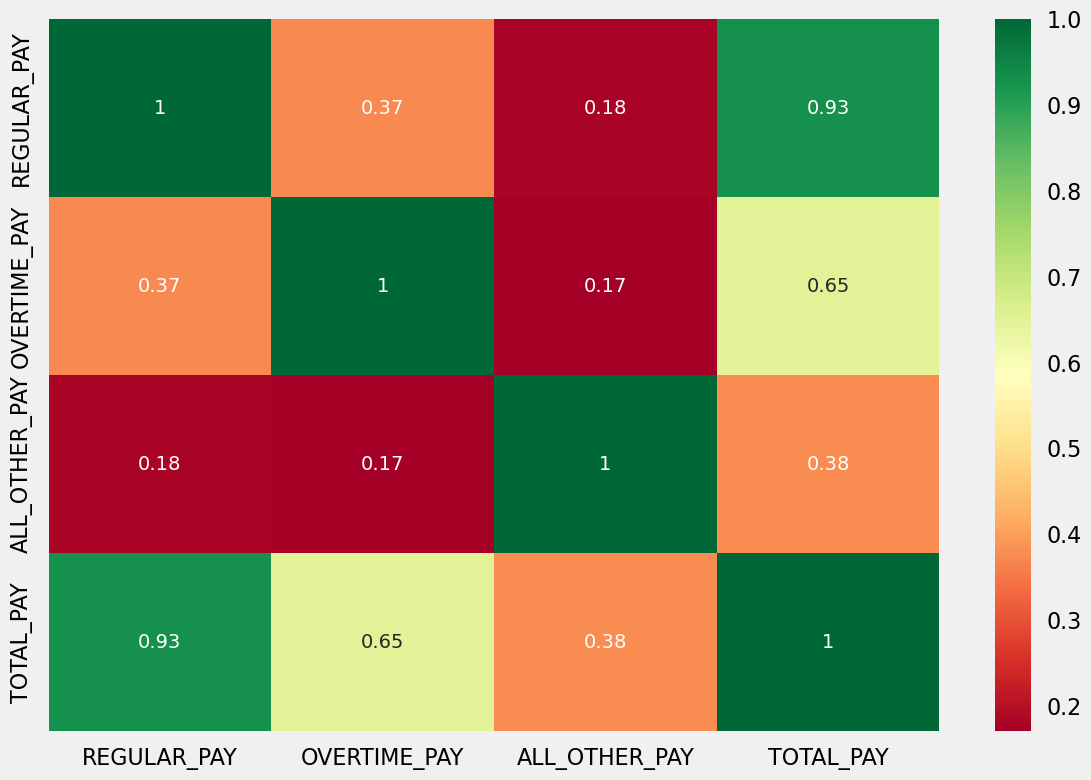

In [45]:

Source = df[["REGULAR_PAY","OVERTIME_PAY","ALL_OTHER_PAY","TOTAL_PAY"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")


In [47]:
job_class_pay_by_year = df.groupby(['PAY_YEAR', 'JOB_CLASS'])['TOTAL_PAY'].mean()
print(job_class_pay_by_year)


PAY_YEAR  JOB_CLASS
2013      0001                     95.8K
          0002                    116.1K
          0003                    107.8K
          0004                    116.1K
          0008                     21.8K
          0010                    279.8K
          0011                    131.3K
          0013                    186.6K
          0015                    103.0K
          0016                    131.3K
          0017                    143.0K
          0101         921.4285714285714
          0102                      6.2K
          0106                     700.0
          0107                      7.8K
          0114                     59.9K
          0115                     250.0
          0119                     575.0
          0121                      1.5K
          0122                     640.0
          0136                     270.0
          0137                      3.0K
          0138                      6.3K
          0139                      4

In [48]:
gender_pay_gap = df.groupby(['PAY_YEAR', 'GENDER'])['TOTAL_PAY'].mean().unstack()
ethnicity_pay_gap = df.groupby(['PAY_YEAR', 'ETHNICITY'])['TOTAL_PAY'].mean().unstack()
print(gender_pay_gap)
print(ethnicity_pay_gap)


GENDER    FEMALE   MALE  OTHER  UNKNOWN
PAY_YEAR                               
2013       54.7K  82.5K    NaN    16.9K
2014       57.8K  86.5K    NaN     7.3K
2015       54.5K  85.4K    NaN     8.3K
2016       50.4K  80.9K    NaN      NaN
2017       52.6K  84.0K    NaN      NaN
2018       51.5K  82.4K    NaN      NaN
2019       56.2K  91.5K    NaN      NaN
2020       64.4K 100.5K    NaN      NaN
2021       65.4K  95.0K    NaN      NaN
2022       33.6K  50.0K  38.0K   150.83
ETHNICITY  AMERICAN INDIAN  AMERICAN INDIAN/ALASKAN NATIVE  ASIAN  ASIAN AMERICAN  BLACK  CAUCASIAN  FILIPINO  FILLIPINO  HISPANIC  NATIVE_AMERICAN  NOT APPLICABLE  OTHER  PACIFIC ISLANDER  TWO OR MORE RACES  UNKNOWN
PAY_YEAR                                                                                                                                                                                                                
2013                 76.8K                             NaN  79.7K             NaN  63.

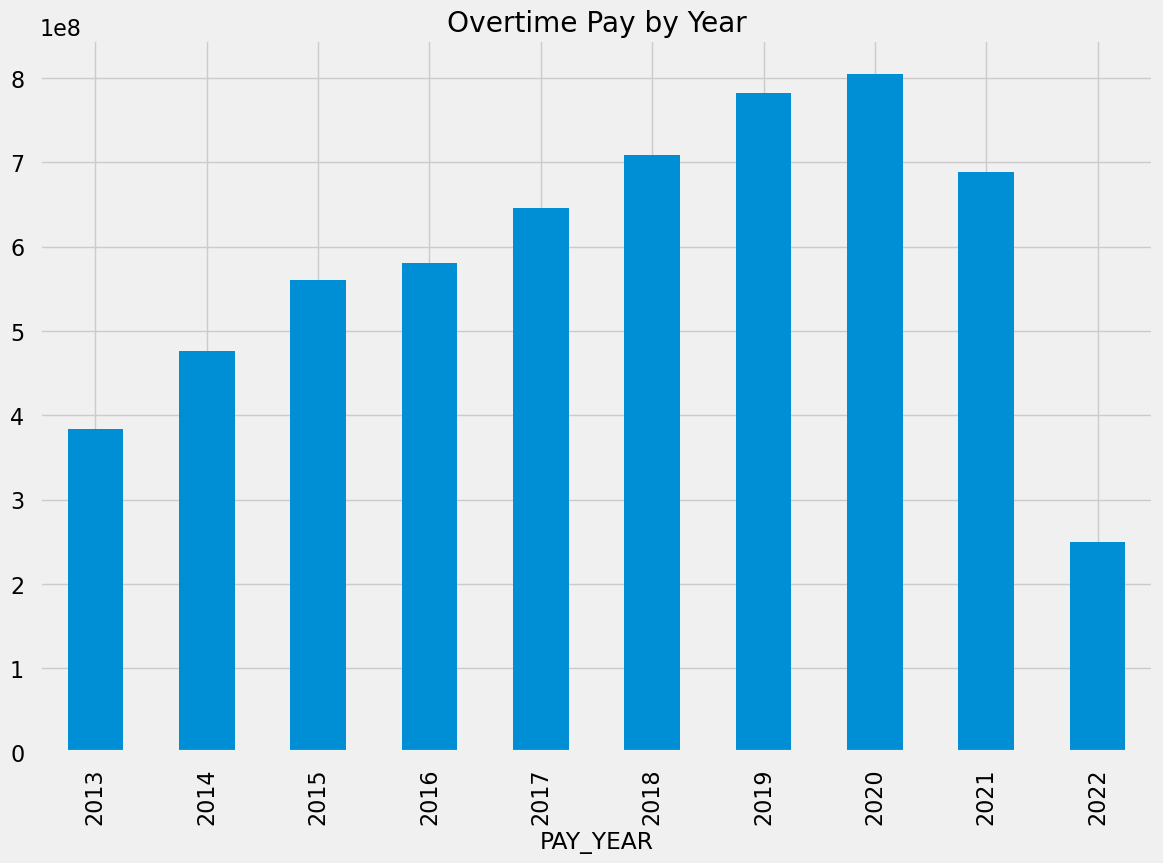

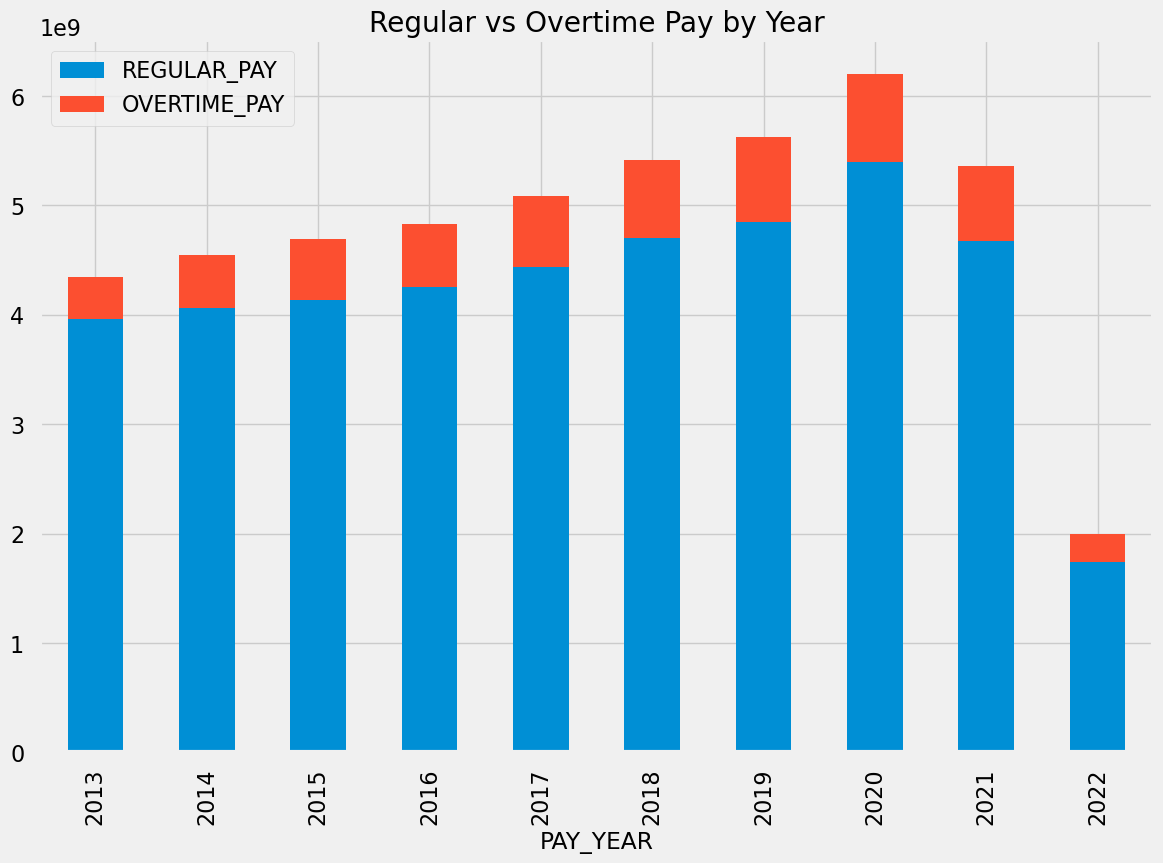

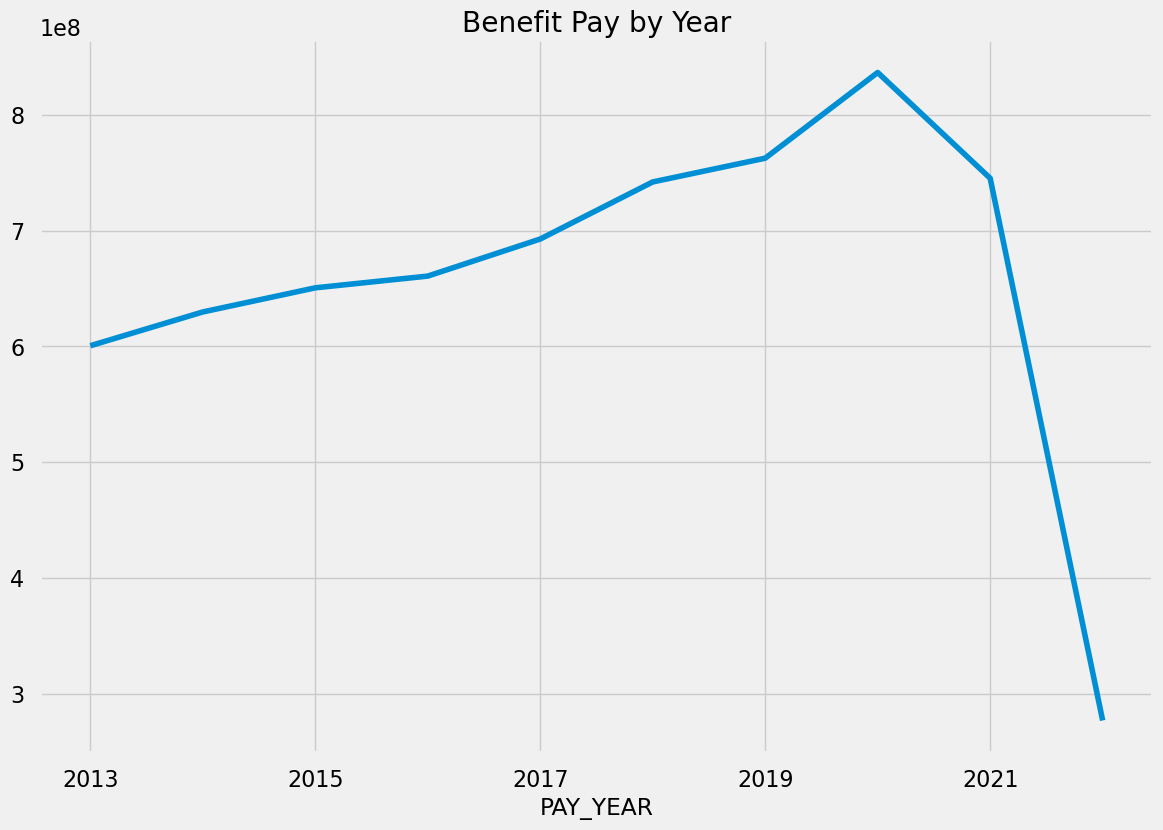

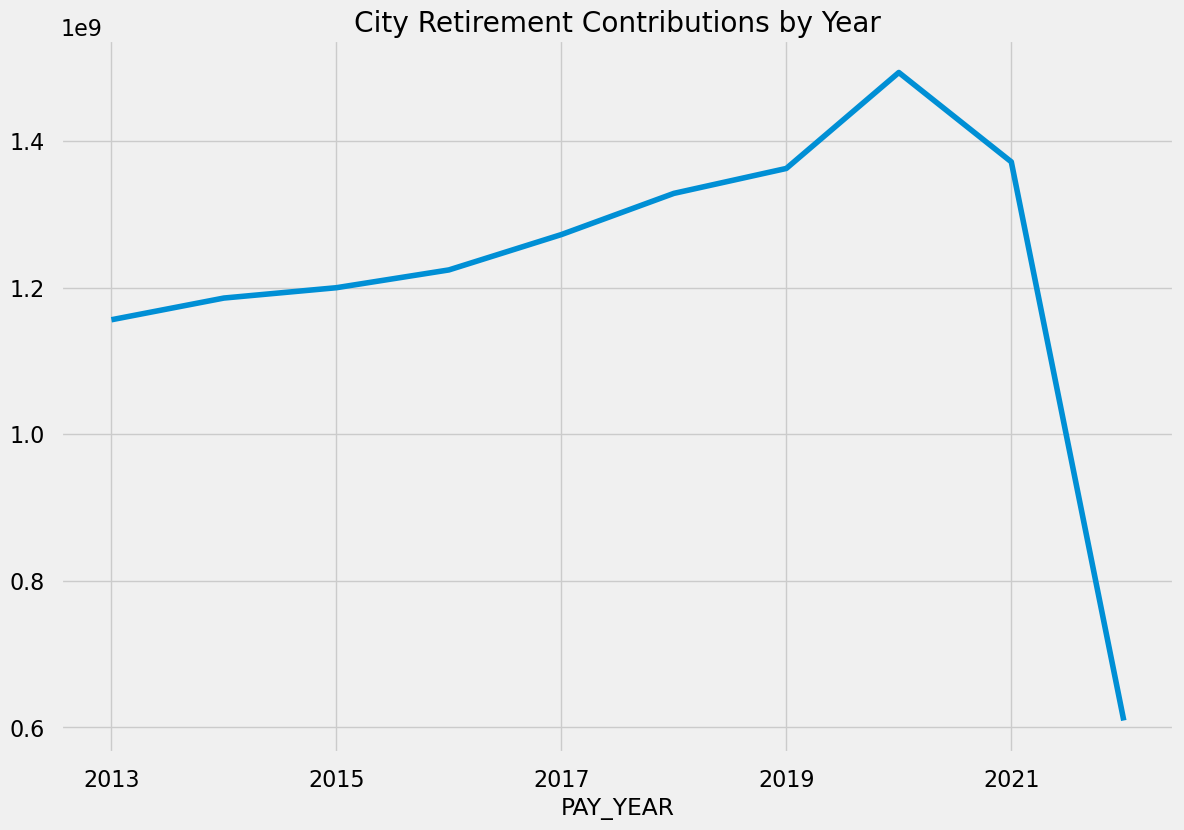

In [50]:
# Overtime Pay by Year
overtime_pay_by_year.plot(kind='bar', title='Overtime Pay by Year')
plt.show()

# Regular vs Overtime Pay
regular_vs_overtime_pay.plot(kind='bar', stacked=True, title='Regular vs Overtime Pay by Year')
plt.show()

# Benefit Pay by Year
benefit_pay_by_year.plot(kind='line', title='Benefit Pay by Year')
plt.show()

# City Retirement Contributions by Year
retirement_contributions_by_year.plot(kind='line', title='City Retirement Contributions by Year')
plt.show()


In [62]:
df.describe()

,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,685.5K,685.0K,685.0K,685.5K,685.5K,685.5K
mean,61.6K,8.6K,4.8K,74.9K,17.8K,9.6K
std,45.9K,19.5K,10.9K,59.3K,18.9K,7.8K
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0K,0.0,150.0,19.3K,0.0,1.5K
50%,61.5K,369.13,1.6K,70.6K,12.1K,8.6K
75%,96.2K,7.9K,5.1K,113.4K,28.2K,16.5K
max,462.5K,434.4K,2.4M,2.4M,164.9K,255.6K


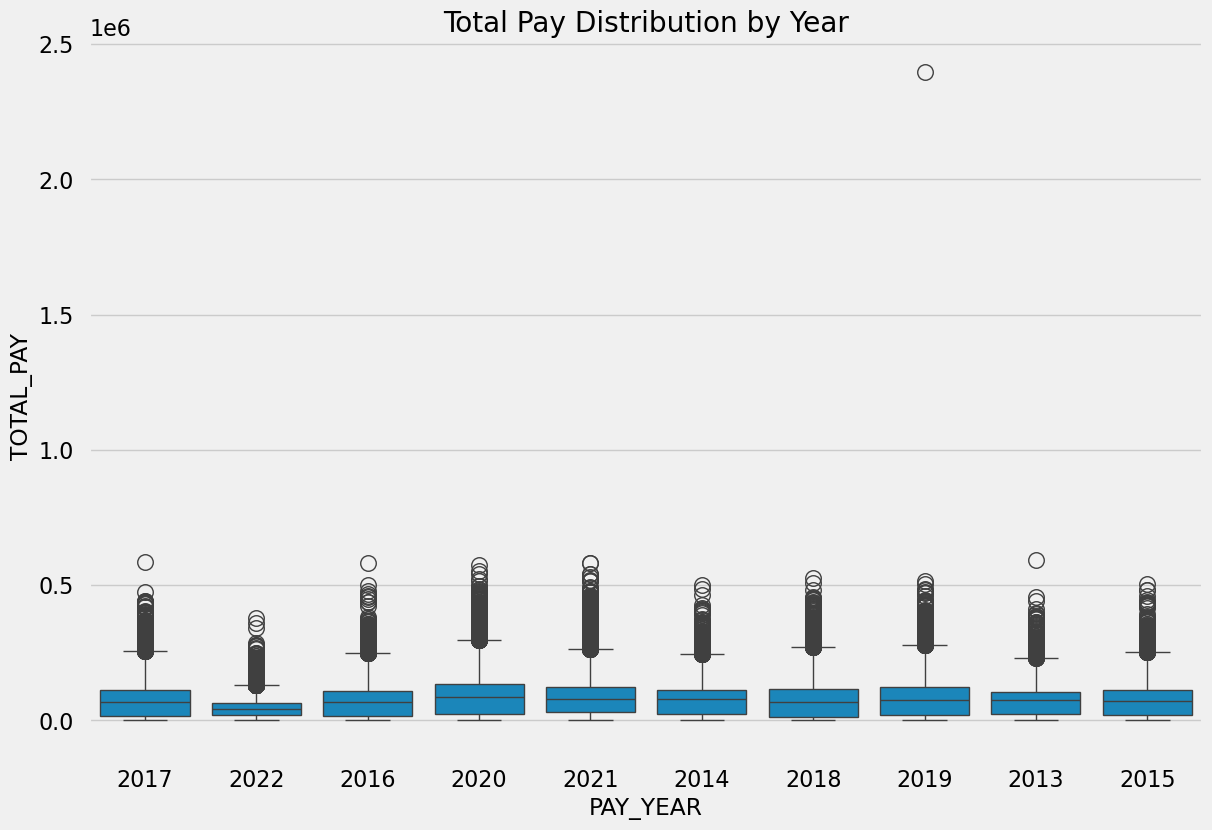

In [42]:
import seaborn as sns

sns.boxplot(x='PAY_YEAR', y='TOTAL_PAY', data=df)
plt.title('Total Pay Distribution by Year')
plt.show()


In [63]:
def get_max_pay_for_year(df, year):
    # Filter the dataframe for the specified year
    df_year = df[df['PAY_YEAR'] == year]

    # Check if df_year is not empty
    if not df_year.empty:
        # Find the index of the maximum total pay in the specified year
        max_total_pay_index = df_year['TOTAL_PAY'].idxmax()

        # Retrieve the record with the maximum total pay in the specified year
        max_total_pay_record = df.loc[max_total_pay_index]
        return max_total_pay_record
    else:
        return f"No records found for the year {year}."

# Example usage
year = 2019
max_pay_record = get_max_pay_for_year(df, year)
print(max_pay_record)


No records found for the year 2019.


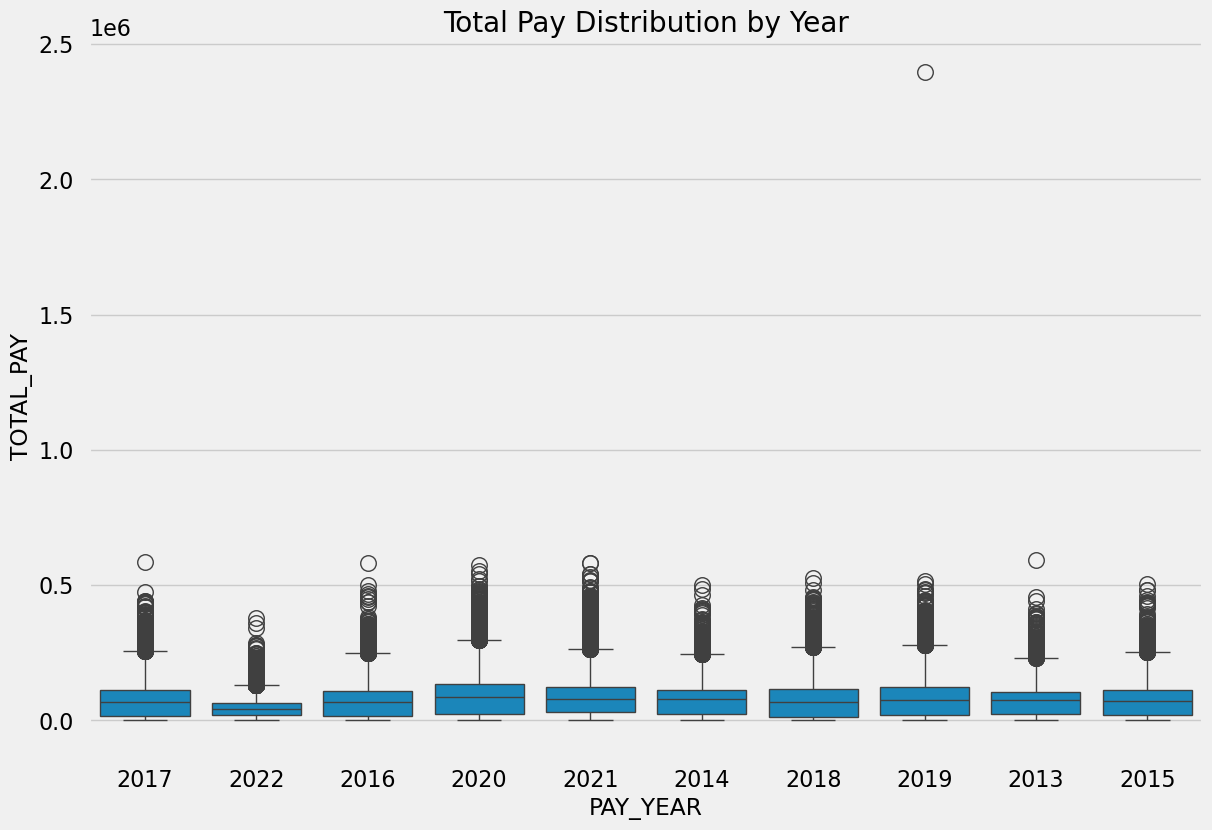

In [64]:
import seaborn as sns

sns.boxplot(x='PAY_YEAR', y='TOTAL_PAY', data=df)
plt.title('Total Pay Distribution by Year')
plt.show()


In [65]:
# Find the index of the maximum total pay
max_total_pay_index = df['TOTAL_PAY'].idxmax()

# Retrieve the record with the maximum total pay
max_total_pay_record = df.loc[max_total_pay_index]
print(max_total_pay_record)


RECORD_NBR                                             3735323437
PAY_YEAR                                                     2019
DEPARTMENT_NO                                                  82
DEPARTMENT_TITLE                        PUBLIC WORKS - SANITATION
JOB_TITLE                        WASTEWATER COLLECTION SUPERVISOR
EMPLOYMENT_TYPE                                         FULL_TIME
JOB_STATUS                                                 ACTIVE
MOU                                                          12.0
MOU_TITLE                                 SUPERVISORY BLUE COLLAR
REGULAR_PAY                                                   0.0
OVERTIME_PAY                                                  0.0
ALL_OTHER_PAY                                                2.4M
TOTAL_PAY                                                    2.4M
CITY_RETIREMENT_CONTRIBUTIONS                                 0.0
BENEFIT_PAY                                                   0.0
GENDER    

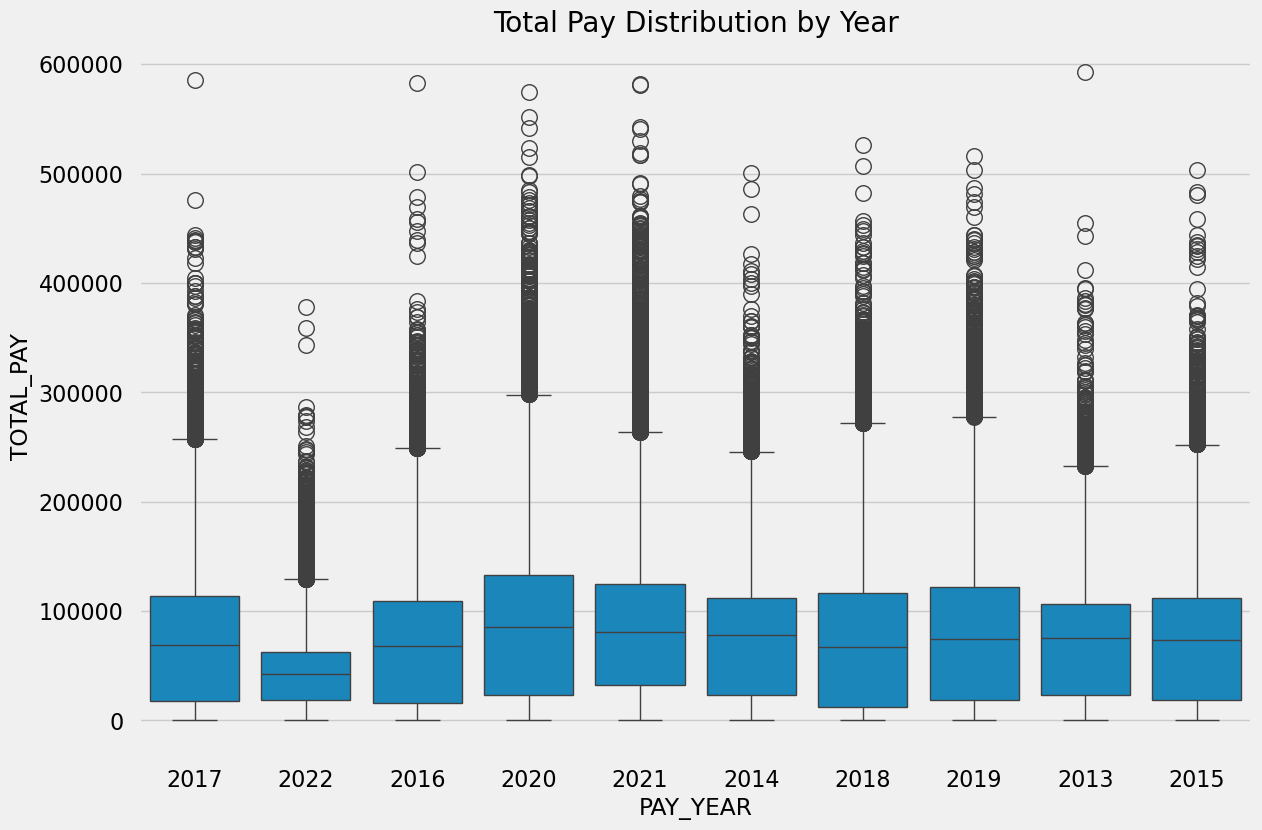

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want to exclude rows with RECORD_NBR 3735323437
df_filtered = df[df['RECORD_NBR'] != 3735323437]

sns.boxplot(x='PAY_YEAR', y='TOTAL_PAY', data=df_filtered)
plt.title('Total Pay Distribution by Year')
plt.show()


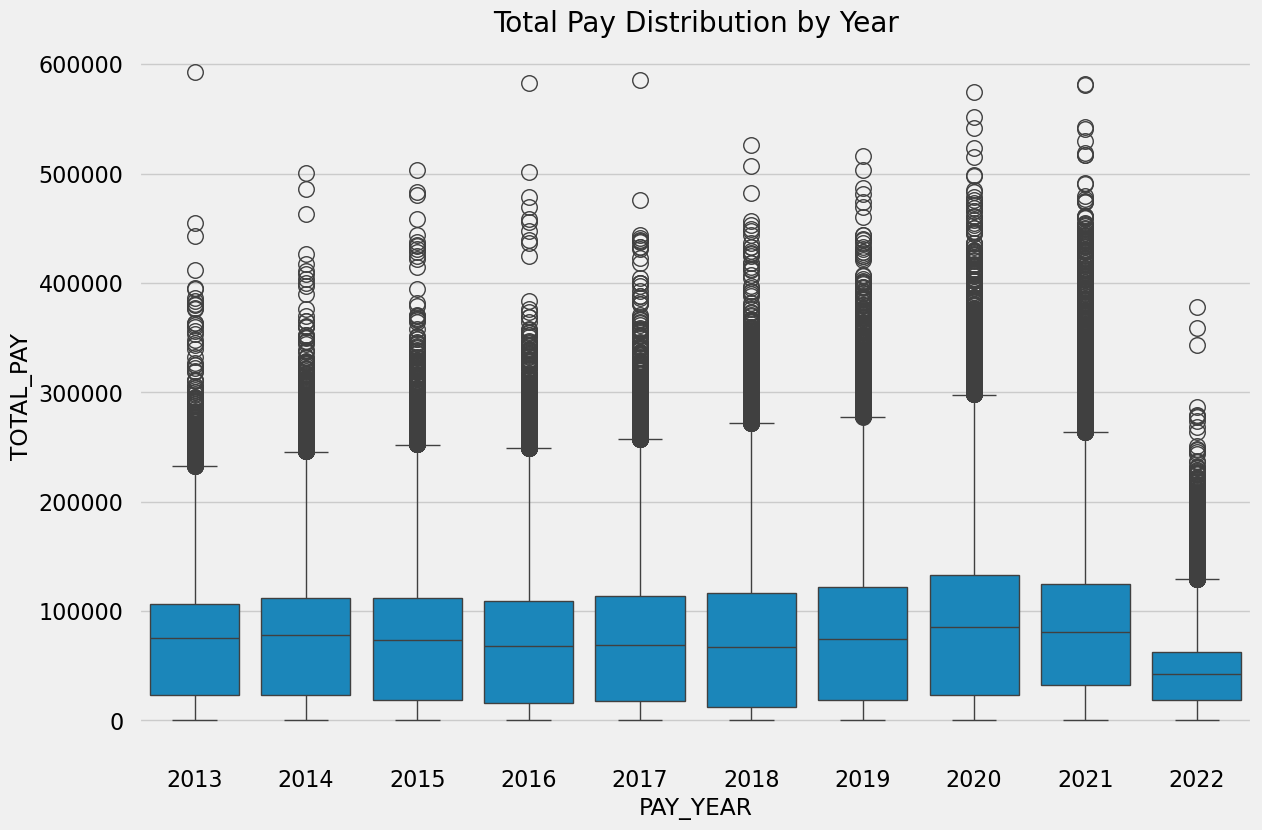

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want to exclude rows with RECORD_NBR 3735323437
df_filtered = df[df['RECORD_NBR'] != 3735323437]

# Sort the DataFrame by PAY_YEAR in ascending order
df_sorted = df_filtered.sort_values(by='PAY_YEAR')

sns.boxplot(x='PAY_YEAR', y='TOTAL_PAY', data=df_sorted)
plt.title('Total Pay Distribution by Year')
plt.show()


In [72]:
import pandas as pd

# Assuming df is your DataFrame and it has a 'PAY_YEAR' column
# First, ensure 'PAY_YEAR' is sorted
df_sorted = df.sort_values(by='PAY_YEAR')

# Calculate YoY percentage change for 'TOTAL_PAY'
df_sorted['YoY_CHANGE'] = df_sorted['TOTAL_PAY'].pct_change() * 100

# Display the DataFrame with YoY change
print(df_sorted[['PAY_YEAR', 'TOTAL_PAY', 'YoY_CHANGE']])


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

